In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [3]:
train_path='train_data.txt'
train_data=pd.read_csv( train_path , sep=':::',engine='python',names=['Title','Genre','Description'])
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_path='train_data.txt'
test_data=pd.read_csv( train_path , sep=':::',engine='python',names=['Title','Genre','Description'])
test_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [7]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

Text(0, 0.5, 'Count')

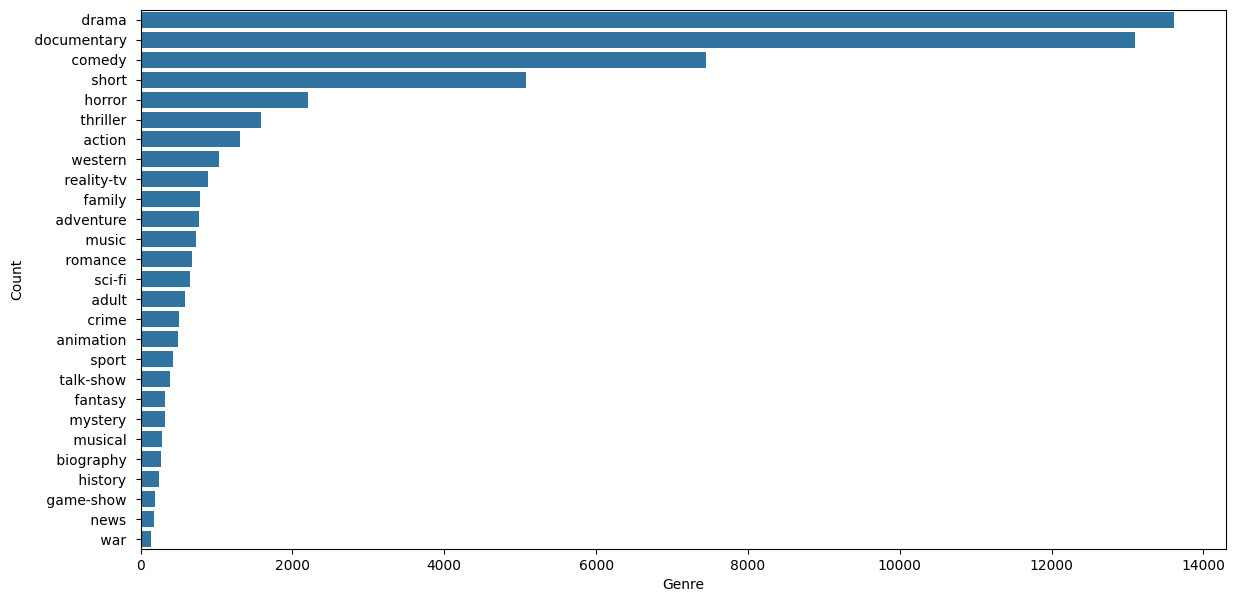

In [8]:
plt.figure(figsize=(14,7)) 
counts = train_data.Genre.value_counts() 
sns.barplot(x=counts, y=counts.index, orient='h') 
plt.xlabel('Genre') 
plt.ylabel('Count')

ValueError: weight='thin' is invalid

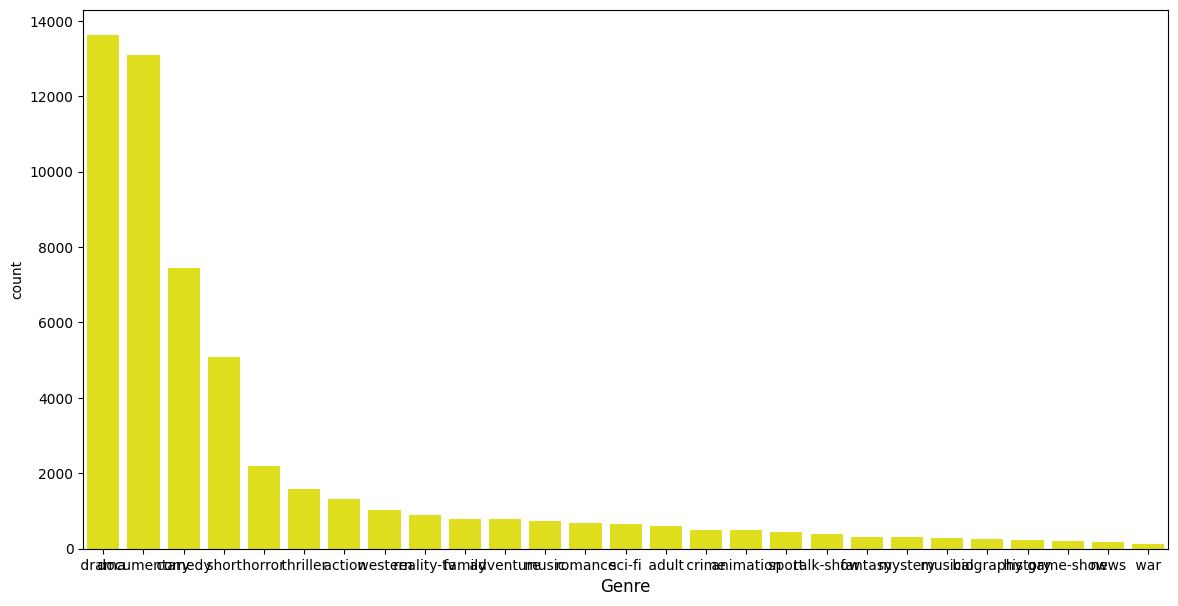

In [9]:
plt.figure(figsize=(14,7)) 
counts = train_data.Genre.value_counts() 
sns.barplot(x=counts.index, y=counts, color='yellow') 
plt.xlabel('Genre', fontsize=12, fontweight='thin') 
plt.ylabel('Count', fontsize=12, fontweight='thin') 
plt.title('Distribution of Genres', fontsize=15, fontweight='thin') 
plt.xticks(rotation=60, fontsize=12, fontweight='thin');

In [10]:
train_data['length']=train_data['Description'].apply(len) 
train_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


In [11]:
test_data['length']=test_data['Description'].apply(len) 
test_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


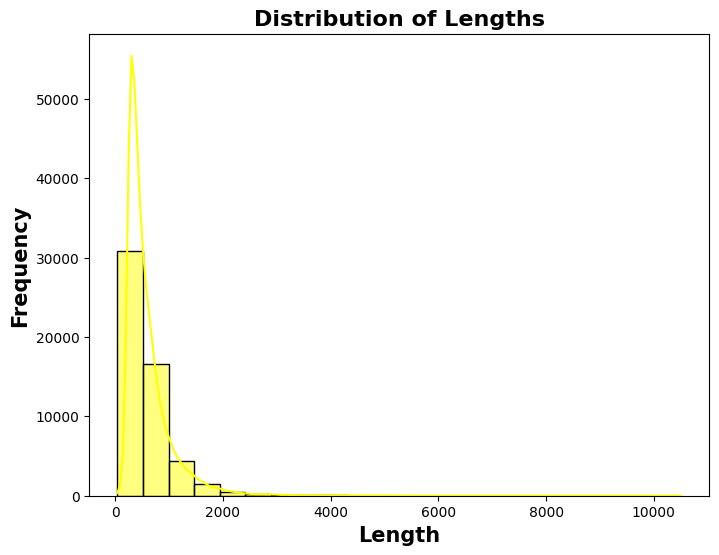

In [12]:
plt.figure(figsize=(8, 6))

sns.histplot(data=train_data, x='length', bins=22, kde=True, color='yellow')

plt.xlabel('Length', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

In [68]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
   
    text = text.lower()                                 
    text = re.sub('-',' ',text.lower())   
    text = re.sub(f'[{string.digits}]',' ',text)  
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    text =  re.sub(r'@\S+', '',text)                   
    text =  re.sub(r'http\S+', '',text)                  
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')   
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) 


input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


In [69]:
train_data['Text_cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_cleaning'] = test_data.Description.apply(clean_text)

train_data.head()

,Title,Genre,Description,length,Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...


In [72]:
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len) 
train_data.head() 

,Title,Genre,Description,length,Text_cleaning,length_Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,83
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,325
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,616
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...,282


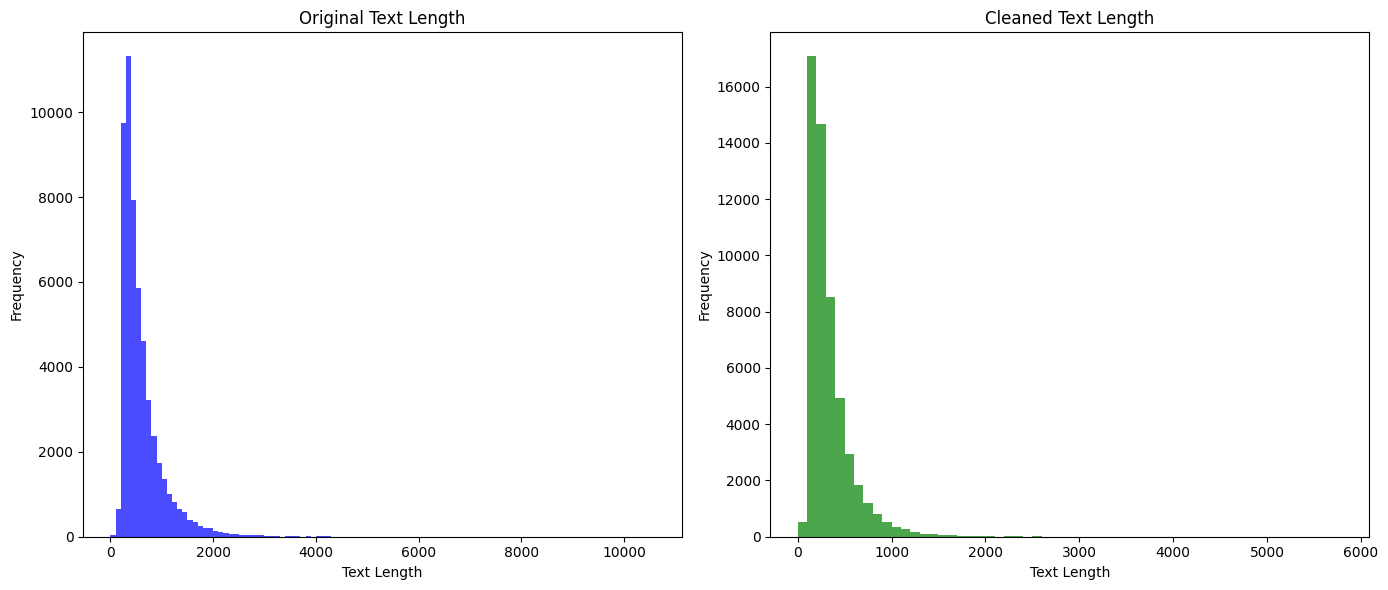

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [74]:
(train_data['length_Text_cleaning']>200).value_counts()

length_Text_cleaning
True     36446
False    17768
Name: count, dtype: int64

In [75]:
print('Dataframe size (before removal):', len(train_data))

filt = train_data['length_Text_cleaning'] > 200

train_data.drop(train_data[filt].index, axis=0, inplace=True)

print('Dataframe size (after removal):', len(train_data))
print(f'Removed rows: {filt.sum()}')


Dataframe size (before removal): 54214
Dataframe size (after removal): 17768
Removed rows: 36446


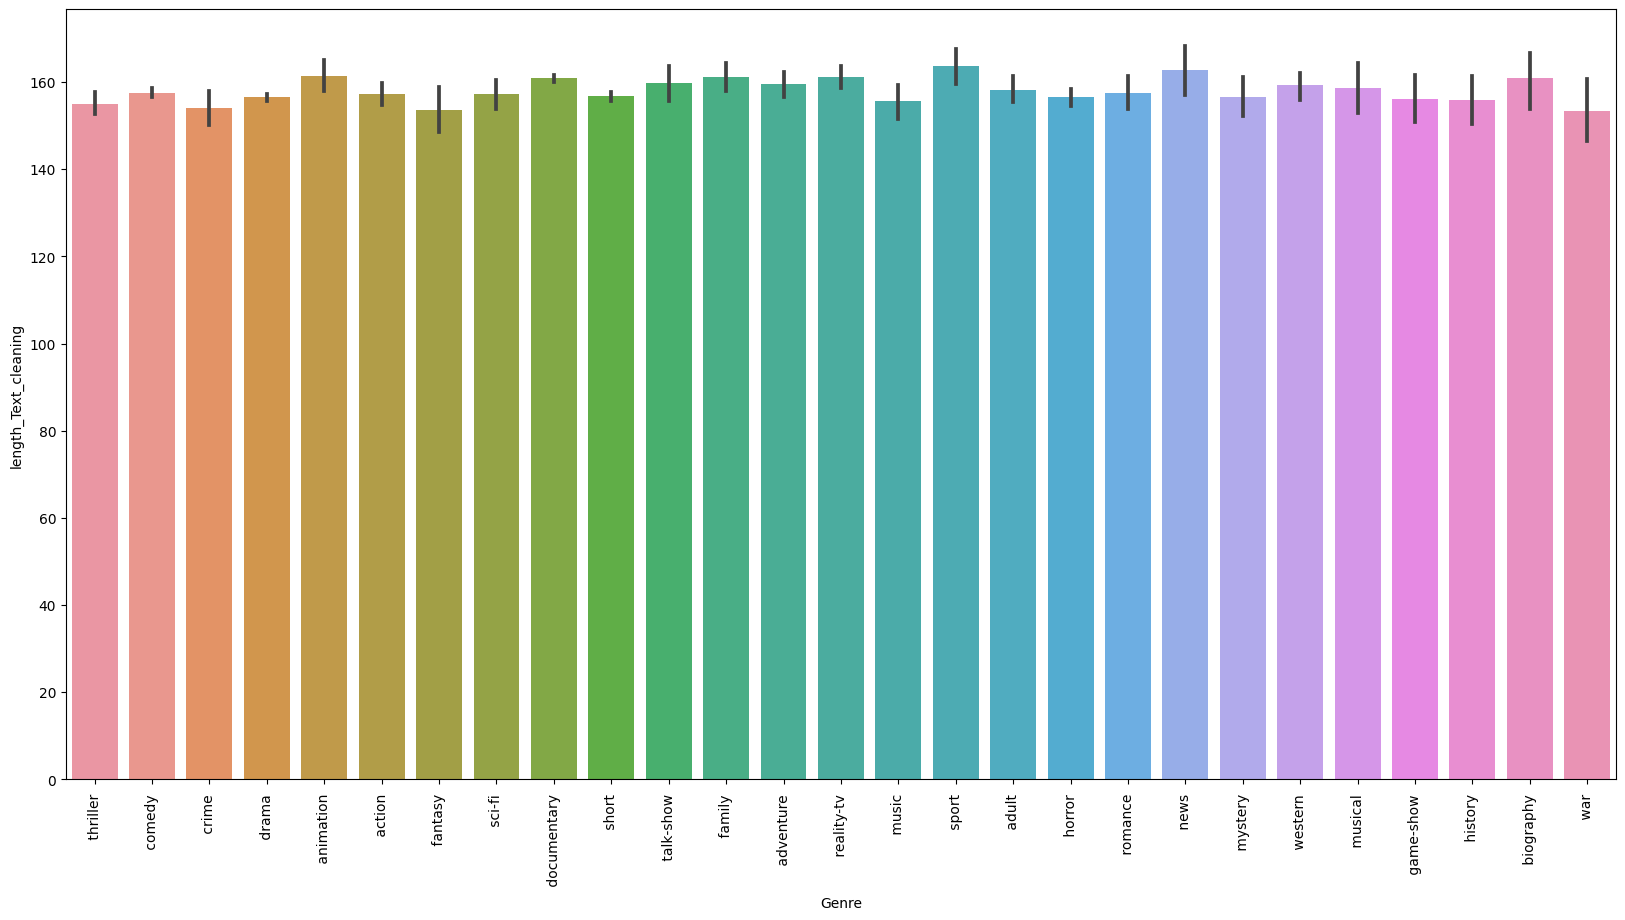

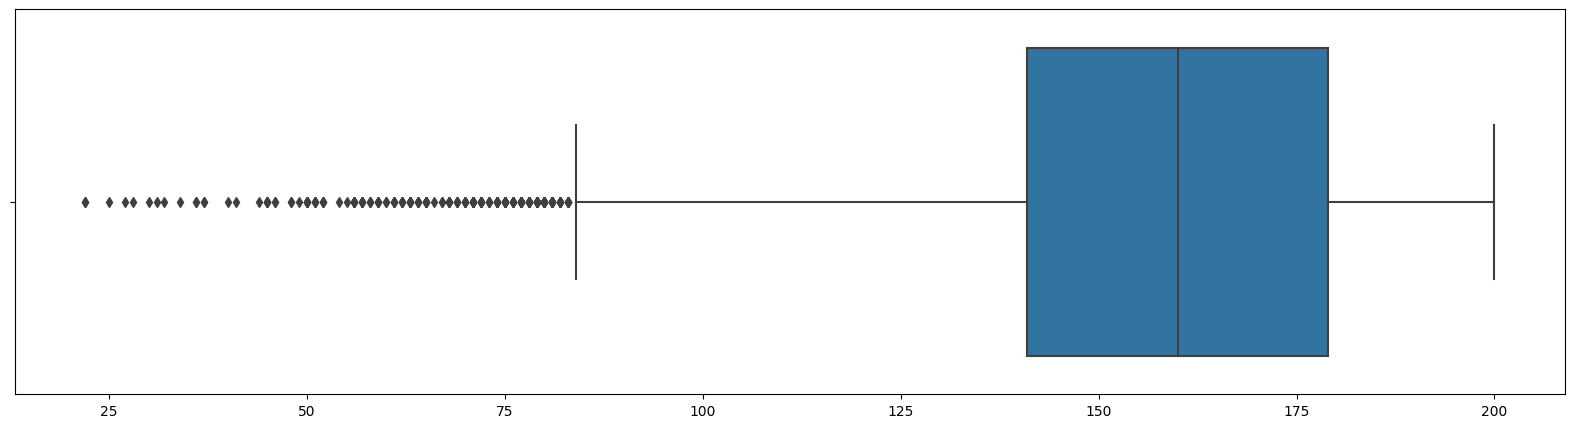

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(x='Genre',y='length_Text_cleaning',data=train_data)  # from 600ish to 350ish -> significant reduction in length
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=train_data['length_Text_cleaning'].values,hue='Genre',data=train_data)
plt.show()


In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
num_words = 50000
max_len = 2500

tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['Text_cleaning'].values)
print(f"Top 10 most frequent words: {list(tokenizer.word_index.keys())[:10]}")
print(f"Total unique tokens: {len(tokenizer.word_index)}")

sequences = tokenizer.texts_to_sequences(train_data['Text_cleaning'].values)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
print(f"Padded sequences shape: {padded_sequences.shape}")


Top 10 most frequent words: ['film', 'find', 'lif', 'story', 'young', 'liv', 'man', 'new', 'get', 'tak']
Total unique tokens: 37705
Padded sequences shape: (17768, 2500)


In [84]:

test_path = 'test_data_solution.txt'
test_data_solution = pd.read_csv(test_path, sep=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])
print(test_data_solution.head())



   ID                          Title          Genre  \
0   1          Edgar's Lunch (1998)       thriller    
1   2      La guerra de papá (1977)         comedy    
2   3   Off the Beaten Track (2010)    documentary    
3   4        Meu Amigo Hindu (2015)          drama    
4   5             Er nu zhai (1955)          drama    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


In [85]:
X = tokenizer.texts_to_sequences(train_data['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['Genre']).values

X_test = tokenizer.texts_to_sequences(test_data['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_data_solution['Genre']).values

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
EMBEDDING_DIM = 100

model = Sequential()

# Add layers to the model
model.add(Embedding(input_dim=num_words, output_dim=EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='sigmoid'))


model.compile(loss='categorical_crossentrophy', optimizer='adam', metrics=['accuracy'])


In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]
history = model.fit(X, y, epochs=6, batch_size=32,validation_data=(X_test,y_test), callbacks=my_callbacks)